<a href="https://colab.research.google.com/github/NahidurRahaman/Python_Note_Book/blob/main/panda_day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
left = pd.DataFrame({"key": ["fool","fool"], "lval":[1,2]})
right = pd.DataFrame({"key": ["fool","fool"], "rval":[4,5]})
left

,key,lval
0,fool,1
1,fool,2


In [3]:
right

,key,rval
0,fool,4
1,fool,5


In [4]:
pd.merge(left, right, on="key")

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [5]:
pd.merge(left, right, on="key", how="outer")

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [6]:
pd.merge(left, right)

,key,lval,rval
0,fool,1,4
1,fool,1,5
2,fool,2,4
3,fool,2,5


In [7]:
df = pd.DataFrame({
    "A": ["a","b","a","a","b","c"],
    "B": ["a","b","a","a","b","c"],
    "C": ["a","b","a","a","b","c"],
    "D":np.random.randn(6),
    "E":np.random.randn(6)
    })
df

,A,B,C,D,E
0,a,a,a,-1.035582,0.754690
1,b,b,b,0.366832,0.681397
2,a,a,a,-0.582976,0.225434
3,a,a,a,-1.239050,-1.050964
4,b,b,b,1.515682,0.197314
5,c,c,c,0.489575,-0.312951


In [8]:
df.groupby("A").sum()

,B,C,D,E
A,,,,
a,aaa,aaa,-2.857608,-0.070840
b,bb,bb,1.882514,0.878710
c,c,c,0.489575,-0.312951


In [9]:
df.groupby(["A","B"]).sum()

,,C,D,E
A,B,,,
a,a,aaa,-2.857608,-0.070840
b,b,bb,1.882514,0.878710
c,c,c,0.489575,-0.312951


# Create a list of tuples using zip and unpacking

In [10]:
tuples = list(zip(*[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"]
]))

# Create a MultiIndex from the tuples, with named levels

In [11]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

# Create a DataFrame with 8 rows and 2 columns, using the MultiIndex

In [12]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [13]:
df2 = df[:4]

In [14]:
df2

A         B
first second                    
bar   one     0.550343 -0.387979
      two    -0.792391  0.817598
baz   one    -1.957485 -0.044122
      two     0.641208 -1.771791

In [15]:
df

A         B
first second                    
bar   one     0.550343 -0.387979
      two    -0.792391  0.817598
baz   one    -1.957485 -0.044122
      two     0.641208 -1.771791
foo   one    -0.437779  1.357993
      two    -1.347849  1.556620
qux   one     1.129036 -0.814194
      two    -0.666760 -0.136161

In [16]:
stacked = df2.stack()

In [17]:
stacked

first  second   
bar    one     A    0.550343
               B   -0.387979
       two     A   -0.792391
               B    0.817598
baz    one     A   -1.957485
               B   -0.044122
       two     A    0.641208
               B   -1.771791
dtype: float64

In [18]:
stacked.unstack()

A         B
first second                    
bar   one     0.550343 -0.387979
      two    -0.792391  0.817598
baz   one    -1.957485 -0.044122
      two     0.641208 -1.771791

In [19]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.550343 -0.792391
      B -0.387979  0.817598
baz   A -1.957485  0.641208
      B -0.044122 -1.771791

In [20]:
stacked.unstack(0)


first          bar       baz
second                      
one    A  0.550343 -1.957485
       B -0.387979 -0.044122
two    A -0.792391  0.641208
       B  0.817598 -1.771791

In [21]:
df = pd.DataFrame({
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A","B","C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12)
})
df

,A,B,C,D,E
0,one,A,foo,0.358439,-0.267478
1,one,B,foo,-0.032296,-0.139661
2,two,C,foo,1.237605,-0.085333
3,three,A,bar,1.823275,-2.274281
4,one,B,bar,0.480864,-1.038458
5,one,C,bar,0.020020,-0.004399
6,two,A,foo,0.387062,0.078036
7,three,B,foo,-0.013406,-0.681825
8,one,C,foo,-0.603461,-1.116184
9,one,A,bar,-0.721915,-0.924203


In [22]:
pd.pivot_table(df, values="D", index=["A","B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.721915  0.358439
      B  0.480864 -0.032296
      C  0.020020 -0.603461
three A  1.823275       NaN
      B       NaN -0.013406
      C -0.134256       NaN
two   A       NaN  0.387062
      B -0.061133       NaN
      C       NaN  1.237605

In [23]:
df = pd.DataFrame({"id":[1,2,3,4,5,6],"Row_grade":["A","B","C","A","B","C"]})
df

,id,Row_grade
0,1,A
1,2,B
2,3,C
3,4,A
4,5,B
5,6,C


In [24]:
df["grade"] = df["Row_grade"].astype("category")
df

,id,Row_grade,grade
0,1,A,A
1,2,B,B
2,3,C,C
3,4,A,A
4,5,B,B
5,6,C,C


In [25]:
df["grade"] = df["grade"].cat.rename_categories(["very good","good","very bad"])

In [26]:
df

,id,Row_grade,grade
0,1,A,very good
1,2,B,good
2,3,C,very bad
3,4,A,very good
4,5,B,good
5,6,C,very bad


In [27]:
df['grade'] = df['grade'].cat.set_categories(["very bad","bad","medium","good","very good"])

In [28]:
df

,id,Row_grade,grade
0,1,A,very good
1,2,B,good
2,3,C,very bad
3,4,A,very good
4,5,B,good
5,6,C,very bad


In [29]:
df.sort_values(by="grade")

,id,Row_grade,grade
2,3,C,very bad
5,6,C,very bad
1,2,B,good
4,5,B,good
0,1,A,very good
3,4,A,very good


In [30]:
df.groupby("grade").size()

<ipython-input-30-586392de31f1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


,0
grade,
very bad,2
bad,0
medium,0
good,2
very good,2


In [31]:
import matplotlib.pyplot as plt
plt.close("all")

<Axes: >

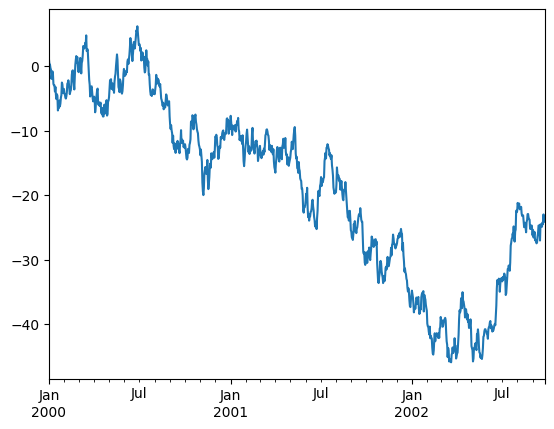

In [32]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

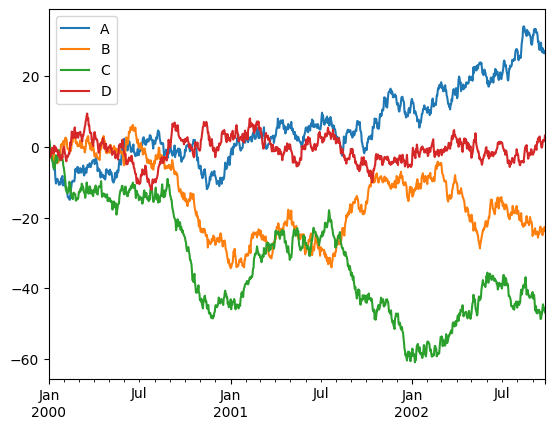

In [33]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=["A","B","C","D"])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

In [34]:
df.to_csv("foo.csv")
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.663932,-0.489720,1.775893,-1.285318
1,2000-01-02,-0.304275,-2.440829,1.879428,-3.233209
2,2000-01-03,-1.368727,-1.818537,0.493971,-2.360962
3,2000-01-04,-1.856023,-1.180276,-0.993110,-2.072824
4,2000-01-05,-2.961756,-1.245650,-2.130628,-2.527631
...,...,...,...,...,...
995,2002-09-22,27.132556,-24.531521,-44.518412,1.930873
996,2002-09-23,26.485231,-23.212231,-45.938745,1.773503
997,2002-09-24,27.212196,-23.920819,-45.417410,1.581885
998,2002-09-25,26.397694,-22.640361,-46.242357,1.965798


In [35]:
df.to_hdf("foo.h5", "df")
pd.read_hdf("foo.h5", "df")

<ipython-input-35-196c5bd69001>:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf("foo.h5", "df")


,A,B,C,D
2000-01-01,-0.663932,-0.489720,1.775893,-1.285318
2000-01-02,-0.304275,-2.440829,1.879428,-3.233209
2000-01-03,-1.368727,-1.818537,0.493971,-2.360962
2000-01-04,-1.856023,-1.180276,-0.993110,-2.072824
2000-01-05,-2.961756,-1.245650,-2.130628,-2.527631
...,...,...,...,...
2002-09-22,27.132556,-24.531521,-44.518412,1.930873
2002-09-23,26.485231,-23.212231,-45.938745,1.773503
2002-09-24,27.212196,-23.920819,-45.417410,1.581885
2002-09-25,26.397694,-22.640361,-46.242357,1.965798


In [36]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.663932,-0.489720,1.775893,-1.285318
1,2000-01-02,-0.304275,-2.440829,1.879428,-3.233209
2,2000-01-03,-1.368727,-1.818537,0.493971,-2.360962
3,2000-01-04,-1.856023,-1.180276,-0.993110,-2.072824
4,2000-01-05,-2.961756,-1.245650,-2.130628,-2.527631
...,...,...,...,...,...
995,2002-09-22,27.132556,-24.531521,-44.518412,1.930873
996,2002-09-23,26.485231,-23.212231,-45.938745,1.773503
997,2002-09-24,27.212196,-23.920819,-45.417410,1.581885
998,2002-09-25,26.397694,-22.640361,-46.242357,1.965798


In [37]:
s= pd.Series(np.random.randn(5), index=["a","b","c","d","e"])
s

,0
a,1.833742
b,0.657349
c,-1.835452
d,-0.045217
e,-0.899991


In [38]:
d = {"b":1,"a":0,"c":2}
pd.Series(d)

,0
b,1
a,0
c,2


In [39]:
pd.Series(d, index=["b","c","d","a"])

,0
b,1.0
c,2.0
d,NaN
a,0.0


In [40]:
pd.Series(5., index=["a","b","c","d","e"])

,0
a,5.0
b,5.0
c,5.0
d,5.0
e,5.0


In [41]:
s[0]

<ipython-input-41-c9c96910e542>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[0]


np.float64(1.833742002914924)

In [42]:
s[:3]

,0
a,1.833742
b,0.657349
c,-1.835452


In [43]:
s[s>s.median()]

,0
a,1.833742
b,0.657349


In [44]:
s[[4,3,1]]

<ipython-input-44-8fa15a5a4312>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[[4,3,1]]


,0
e,-0.899991
d,-0.045217
b,0.657349


In [45]:
np.exp(s)


,0
a,6.257258
b,1.929670
c,0.159541
d,0.955790
e,0.406574


In [46]:
s.array

<NumpyExtensionArray>
[   np.float64(1.833742002914924),    np.float64(0.657348866373023),
   np.float64(-1.835451555204794), np.float64(-0.04521697518629824),
  np.float64(-0.8999905440517865)]
Length: 5, dtype: float64

In [47]:
s.to_numpy()

array([ 1.833742  ,  0.65734887, -1.83545156, -0.04521698, -0.89999054])

In [48]:
s["a"]

np.float64(1.833742002914924)

In [49]:
s["e"]

np.float64(-0.8999905440517865)

In [50]:
np.exp(s)

,0
a,6.257258
b,1.929670
c,0.159541
d,0.955790
e,0.406574


In [51]:
s[1:] + s[:-1]

,0
a,NaN
b,1.314698
c,-3.670903
d,-0.090434
e,NaN


In [52]:
s= pd.Series(np.random.randn(5),name = "somtheing")

In [53]:
s


,somtheing
0,0.440566
1,0.107050
2,-1.410713
3,-0.366123
4,0.446108


In [54]:
s2 = s.rename("different")
s2.name

'different'

In [55]:
d = {
    "one": pd.Series([1.0,2.0,3.0],index=["a","b","c"])
    ,"two": pd.Series([1.0,2.0,3.0,4.0],index=["a","b","c","d"])
}
df = pd.DataFrame(d)
df




,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [56]:
pd.DataFrame(d, index=["d","b","a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [57]:
pd.DataFrame(d, index=["d","b","a"], columns=["two","three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [58]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [59]:
df.columns

Index(['one', 'two'], dtype='object')

In [60]:
d= {"one":[1.,2.,3.,4.],"two":[4.,3.,2.,1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [61]:
pd.DataFrame(d, index=["a","b","c","d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [62]:
data = np.zeros((2,), dtype=[("A","i4"),("B","f4"),("C","a10")])
data[:] = [(1,2.0,"hello"),(2,3.0,"world")]
pd.DataFrame(data)

<ipython-input-62-690c49b9be36>:1: DeprecationWarning: Data type alias 'a' was deprecated in NumPy 2.0. Use the 'S' alias instead.
  data = np.zeros((2,), dtype=[("A","i4"),("B","f4"),("C","a10")])


,A,B,C
0,1,2.0,b'hello'
1,2,3.0,b'world'


In [63]:
pd.DataFrame(data, index=["first","second"])

,A,B,C
first,1,2.0,b'hello'
second,2,3.0,b'world'


In [64]:
pd.DataFrame(data, columns=["C","A","B"])

,C,A,B
0,b'hello',1,2.0
1,b'world',2,3.0


In [65]:
data2 = [{"a":1,"b":2},{"a":5,"b":10,"c":7}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,7.0


In [66]:
pd.DataFrame(data2, index=["first","second"])

,a,b,c
first,1,2,NaN
second,5,10,7.0


In [67]:
pd.DataFrame({("a","b"):{("A","B"):1,("A","C"):2},("a","a"):{("A","C"):3,("A","B"):4}})

a   
     b  a
A B  1  4
  C  2  3

In [68]:
pd.DataFrame({
    ("a","b"):{("A","B"):1,("A","C"):2},
    ("a","a"):{("A","C"):3,("A","B"):4},
    ("a","c"):{("A","C"):5,("A","B"):6},
    ("a","c"):{("A","C"):5,("A","B"):6},
    ("a","c"):{("A","C"):5,("A","B"):6}
})

a      
     b  a  c
A B  1  4  6
  C  2  3  5

In [69]:
from collections import namedtuple
Point = namedtuple("Point",["x","y"])
df = pd.DataFrame([Point(0,0), Point(0,3),(2,3)])
df

,x,y
0,0,0
1,0,3
2,2,3


In [70]:
point3D = namedtuple("Point3D","x y z")


In [71]:
pd.DataFrame([point3D(0,0,0),point3D(0,3,0),point3D(2,3,0)])

,x,y,z
0,0,0,0
1,0,3,0
2,2,3,0


In [72]:
from dataclasses import make_dataclass
Point = make_dataclass("Point",[("x",int),("y",int)])
df = pd.DataFrame([Point(0,0),Point(0,3),Point(2,3)])
df

,x,y
0,0,0
1,0,3
2,2,3


In [73]:
pd.DataFrame.from_dict(dict([("A", [1,2,3]),("B",[4,5,6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [74]:
pd.DataFrame.from_dict(dict([("A", [1,2,3]),("B",[4,5,6])]), orient="index", columns=["one","two","three"])

,one,two,three
A,1,2,3
B,4,5,6


In [75]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'hello',1,2.0
b'world',2,3.0


In [80]:
df = pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]), orient="index", columns=["one", "two", "three"])

In [81]:
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df

,one,two,three,flag
A,1,2,2,False
B,4,5,20,True


In [82]:
del df["two"]
three = df.pop("three")
df

,one,flag
A,1,False
B,4,True


In [83]:
df["foo"] = "bar"
df

,one,flag,foo
A,1,False,bar
B,4,True,bar


In [84]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
A,1,False,bar,1
B,4,True,bar,4


In [85]:
df.insert(1,"bar",df["one"])
df

,one,bar,flag,foo,one_trunc
A,1,1,False,bar,1
B,4,4,True,bar,4


In [88]:
from google.colab import drive
drive.mount('/content/mydrive/')

Mounted at /content/mydrive/


In [91]:
iris = pd.read_csv("/content/mydrive/MyDrive/Iris.csv") # If the file is in the current working directory

In [92]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [93]:
iris.assign(sepal_ratio = iris["SepalWidthCm"] / iris["SepalLengthCm"]).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [94]:
iris.assign(sepal_ratio = lambda x: (x["SepalWidthCm"] / x["SepalLengthCm"])).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_ratio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.720000
